The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

The files contain one message per line. Each line is composed by two columns: class (spam or ham) and raw message.

This data will be our labeled training set. Using these ham/spam examples, we'll train a machine learning model to learn to discriminate between ham/spam automatically. Then, with a trained model, we'll be able to classify arbitrary unlabeled messages as ham or spam.

### Goal - To build a predictive model which will determine whether a text message is spam or ham. 

#### Multinomial Naive Bayes

Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article. It calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output.

Bayes theorem, formulated by Thomas Bayes, calculates the probability of an event occurring based on the prior knowledge of conditions related to an event. It is based on the following formula:

P(A|B) = P(A) * P(B|A)/P(B)


Where we are calculating the probability of class A when predictor B is already provided.

P(B) = prior probability of B

P(A) = prior probability of class A

P(B|A) = occurrence of predictor B given class A probability

This formula helps in calculating the probability of the tags in the text.

#### Imports required packages

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("spam.csv", encoding = "latin-1")

In [3]:
data.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)

In [5]:
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.shape

(5572, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   class    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


There are some repetative messages in the data. Lets check the top messages of data to find the most repetative messages

In [8]:
data.groupby('class').describe()

message                                                               
        count unique                                                top freq
class                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
topMessages = data.groupby("message")["class"].agg([len, np.max]).sort_values(by = "len", ascending = False).head(n = 5)
display(topMessages)

C:\Users\VISHAL\AppData\Local\Temp\ipykernel_14096\2437635339.py:1: FutureWarning: The provided callable <function max at 0x0000016B75BD6CA0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  topMessages = data.groupby("message")["class"].agg([len, np.max]).sort_values(by = "len", ascending = False).head(n = 5)


,len,max
message,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham


So. People are really busy it seems. "Sorry, i'll call later" tops the ham message list with 30 counts with "I cant pick the phone right now. Pls send a message" comes second with 12 counts.

Theres a quite lot of Ok..., Okie and Ok. in there too 

#### How long are the messages?

In [10]:
data['length'] = data['message'].map(lambda text: len(text))
print (data.head())

  class                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Frequency'>

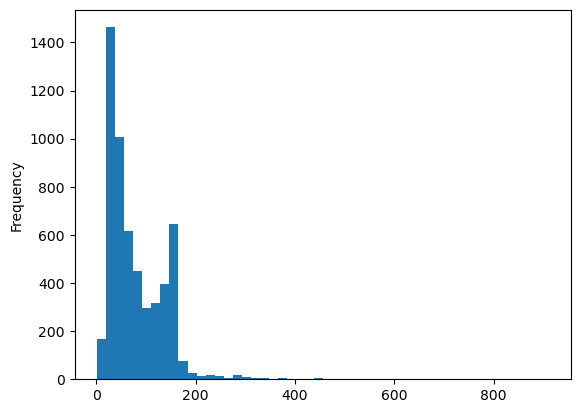

In [12]:
data.length.plot(bins=50, kind='hist')

We can see here maximum messages contains number of words in the range of [0, 200]. 

In [13]:
data.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

The average length of the message is 80, while the minimum length is 2 and maximun length is 910.

#### Is there any difference in message length between spam and ham?

C:\Users\VISHAL\AppData\Local\Temp\ipykernel_14096\3026217270.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["class"] == "spam"]["length"], bins = 100, ax = ax[0])
C:\Users\VISHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VISHAL\AppData\Local\Temp\ipykernel_14096\3026217270.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `disp

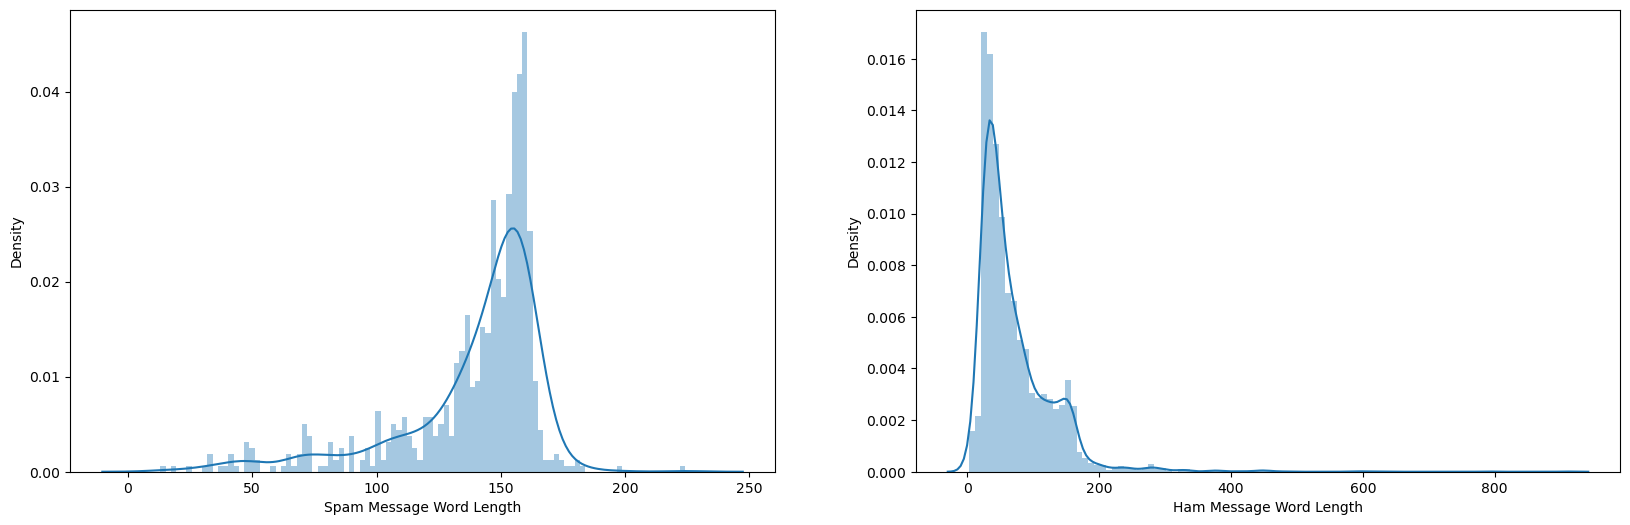

In [14]:
f, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(data[data["class"] == "spam"]["length"], bins = 100, ax = ax[0])
ax[0].set_xlabel("Spam Message Word Length")

sns.distplot(data[data["class"] == "ham"]["length"], bins = 100, ax = ax[1])
ax[1].set_xlabel("Ham Message Word Length")

plt.show()

Looks like spam messages are usually longer. Maybe messageLength can become a feature to predict whether the message is spam/ ham ?

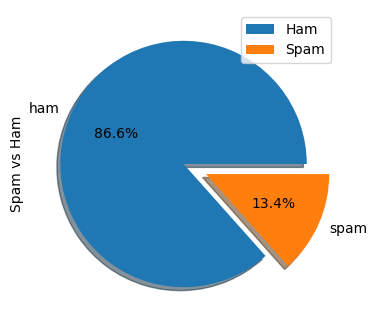

In [15]:
data["class"].value_counts().plot(kind = 'pie', explode = [0,0.2], figsize = (4,4), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [16]:
data["class"].value_counts()

class
ham     4825
spam     747
Name: count, dtype: int64

A lot of messages are actually not spam. About 87% of our dataset consists of normal messages.

While we split our data set into train and test or when we use cross validation, we will have to use stratified sampling, otherwise we have a chance of our training model being skewed towards normal messages. If the sample we choose to train our model consists majorly of normal messages, it may end up predicting everything as ham and we might not be able to figure this out since most of the messages we get are actually ham and will have a pretty good accuracy.

A very basic model would be a model that predicts everything as ham. It would have a decent accuracy. But then again, is that right? No. We will then have to use an accuracy metric that keeps this in mind. Goal : We don't mind if we miss the odd spam message but we surely don't want to mark a ham message as spam i.e Precision is very important. 

In [17]:
spam_messages = data[data["class"] == "spam"]["message"]
ham_messages = data[data["class"] == "ham"]["message"]

In [18]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [19]:
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VISHAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VISHAL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VISHAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
spam_words = []
ham_words = []

def extractSpamWords(spamMessages):
    global spam_words
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_words = spam_words + words
    
def extractHamWords(hamMessages):
    global ham_words
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_words = ham_words + words

spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: message, Length: 4825, dtype: object

In [21]:
len(spam_words)

len([word for word in spam_words if word == 'call'])

346

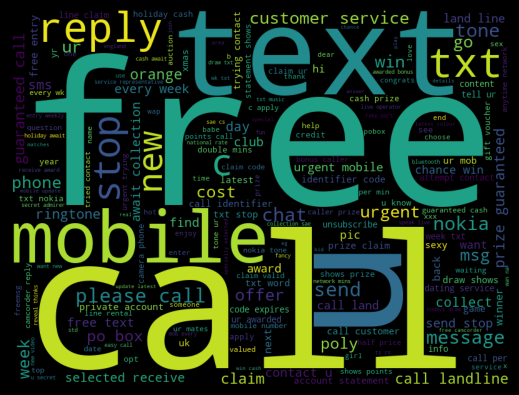

In [22]:
spam_wordcloud = WordCloud(width=800, height=600).generate(" ".join(spam_words))
plt.figure( figsize=(5,5), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

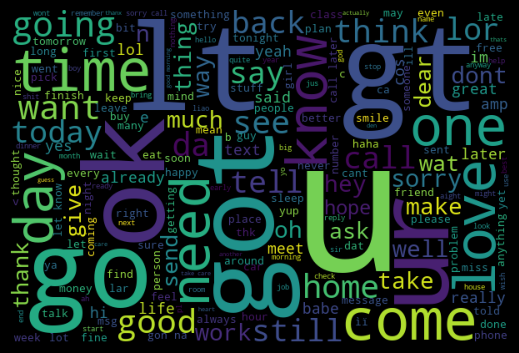

In [23]:
ham_wordcloud = WordCloud(width=600, height=400).generate(" ".join(ham_words))
plt.figure( figsize=(5,5), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [24]:
spam_words = np.array(spam_words)
print("Top 10 Spam words are :\n")
pd.Series(spam_words).value_counts().head(n = 10)

Top 10 Spam words are :



call      346
free      219
txt       156
u         144
ur        144
mobile    123
text      121
stop      114
claim     113
reply     104
Name: count, dtype: int64

In [25]:
ham_words = np.array(ham_words)
print("Top 10 Ham words are :\n")
pd.Series(ham_words).value_counts().head(n = 10)

Top 10 Ham words are :



u       989
gt      318
lt      316
get     301
ok      261
go      248
got     242
ur      237
know    236
like    231
Name: count, dtype: int64

## Data Preprocessing

In [26]:
def cleanText(message):
    
    message = message.translate(str.maketrans('', '', string.punctuation))
#     words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    message = message.lower()
    
    return message

data["message"] = data["message"].apply(cleanText)
data.head(n = 10)

,class,message,length
0,ham,go until jurong point crazy available only in ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor u c already then say,49
4,ham,nah i dont think he goes to usf he lives aroun...,61
5,spam,freemsg hey there darling its been 3 weeks now...,148
6,ham,even my brother is not like to speak with me t...,77
7,ham,as per your request melle melle oru minnaminun...,160
8,spam,winner as a valued network customer you have b...,158
9,spam,had your mobile 11 months or more u r entitled...,154


In [27]:
labels = data['class']
text = data['message']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

In [29]:
X_train, X_remain, y_train, y_remain = train_test_split(text, labels, stratify = labels, random_state=0, test_size=0.3)

X_test, X_val, y_test, y_val = train_test_split(X_remain,y_remain,stratify = y_remain, random_state = 0, test_size = 0.5)

In [30]:
print("Training Data:",X_train.shape,y_train.shape )

print("Testing Data:", X_test.shape,y_test.shape)

print("Validation Data:", X_val.shape,y_val.shape )

Training Data: (3900,) (3900,)
Testing Data: (836,) (836,)
Validation Data: (836,) (836,)


In [31]:
#The CountVectorizer provides a simple way to 
#both tokenize a collection of text documents and build a vocabulary of known words, 
#but also to encode new documents using that vocabulary.

# create the transform
count_vec = CountVectorizer(stop_words='english')

# Learn the vocabulary dictionary and return document- term matrix.
X_train_counts = count_vec.fit_transform(X_train)
# print(X_train_counts)

# (document term) frequency

In [32]:
count_vec.vocabulary_

{'yay': 7334,
 'finally': 2712,
 'lol': 3995,
 'missed': 4303,
 'cinema': 1756,
 'trip': 6696,
 'week': 7062,
 'im': 3435,
 'computerless': 1877,
 'time': 6561,
 'make': 4129,
 'oreo': 4764,
 'truffles': 6707,
 'think': 6511,
 'disturbing': 2284,
 'da': 2055,
 'watching': 7030,
 'house': 3341,
 'ûò': 7425,
 'entertaining': 2509,
 'getting': 2964,
 'hugh': 3376,
 'laurie': 3853,
 'thing': 6508,
 'stick': 6165,
 'especially': 2535,
 'current': 2033,
 'food': 2786,
 'txt': 6745,
 '86888': 684,
 'claim': 1761,
 'reward': 5505,
 'hours': 3340,
 'talk': 6374,
 'use': 6851,
 'phone': 4943,
 'subscribe6gbpmnth': 6247,
 '3hrs': 454,
 '16': 301,
 'stoptxtstop': 6188,
 'wwwgambtv': 7268,
 'great': 3066,
 'send': 5732,
 'account': 782,
 'number': 4634,
 'addie': 809,
 'amp': 933,
 'doing': 2314,
 'art': 1044,
 'ill': 3433,
 'home': 3300,
 'night': 4544,
 'ended': 2486,
 'day': 2103,
 'morning': 4379,
 'come': 1840,
 'special': 6050,
 'way': 7039,
 'smile': 5949,
 'like': 3924,
 'sunny': 6285,
 'ra

In [33]:
len(count_vec.vocabulary_)

7427

In [34]:
#Learn vocabulary and idf from training set.
tf_transformer = TfidfTransformer().fit(X_train_counts)

# Learn vocabulary and idf, return term-document matrix.
X_train_transformed = tf_transformer.transform(X_train_counts)
print(X_train_transformed)

# document term tfidf

  (0, 7334)	0.4336750733873591
  (0, 7062)	0.2911857764059307
  (0, 6696)	0.3934729256613856
  (0, 4303)	0.37678752680355887
  (0, 3995)	0.3084261980557379
  (0, 2712)	0.3934729256613856
  (0, 1756)	0.42473442041165427
  (1, 6707)	0.503006511919739
  (1, 6561)	0.2677452060066485
  (1, 4764)	0.503006511919739
  (1, 4129)	0.30908500173625947
  (1, 3435)	0.21908165181749042
  (1, 1877)	0.5279688382203526
  (2, 6511)	0.4444664954133572
  (2, 2284)	0.7649685357480512
  (2, 2055)	0.4661251696384251
  (3, 7425)	0.741222953793951
  (3, 7030)	0.15750606736213582
  (3, 6508)	0.13822060789005494
  (3, 6165)	0.434012184922105
  (3, 3853)	0.2170060924610525
  (3, 3376)	0.2170060924610525
  (3, 3341)	0.15309416803658543
  (3, 2964)	0.1431737973975559
  (3, 2535)	0.18192681320529333
  :	:
  (3896, 5871)	0.2844356084145918
  (3896, 5865)	0.2844356084145918
  (3896, 5452)	0.1909385955125862
  (3896, 5010)	0.20193081189021833
  (3896, 4740)	0.2945438043370714
  (3896, 4185)	0.3170522853043531
  (3896, 4

In [35]:
X_test_counts = count_vec.transform(X_test)
X_test_transformed = tf_transformer.transform(X_test_counts)

In [36]:
labels = LabelEncoder()
y_train_labels_fit = labels.fit(y_train)
y_train_lables_trf = labels.transform(y_train)

In [37]:
np.unique(y_train_lables_trf)

array([0, 1])

In [38]:
#label mapping of integer to class
label_mapping = dict(zip(labels.classes_,labels.transform(labels.classes_)))
print(label_mapping)

{'ham': 0, 'spam': 1}


# Model Building

In [39]:
model = MultinomialNB()

clf = model.fit(X_train_transformed,y_train_lables_trf)

prediction = clf.predict(X_test_transformed)

In [40]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

## Validation and Prediction

In [41]:
print('Average accuracy on test set={}'.format(np.mean(prediction == labels.transform(y_test))))

Average accuracy on test set=0.9629186602870813


In [42]:
print ('Accuracy', accuracy_score(labels.transform(y_test), prediction))
print()
results = confusion_matrix(labels.transform(y_test), prediction)
print(results)
print()
print ('Report:')
print (classification_report(labels.transform(y_test), prediction))

Accuracy 0.9629186602870813

[[724   0]
 [ 31  81]]

Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       724
           1       1.00      0.72      0.84       112

    accuracy                           0.96       836
   macro avg       0.98      0.86      0.91       836
weighted avg       0.96      0.96      0.96       836



## Deployment

In [43]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [44]:
from textblob import TextBlob
import pickle

In [45]:
weights = 'spam_detection_mnb.sav'
pickle.dump(clf,open(weights,'wb'))

vocab = 'vocabulary_mnb.sav'
pickle.dump(count_vec, open(vocab, 'wb'))

tfidf = 'tfidf_mnb.sav'
pickle.dump(tf_transformer,open(tfidf,'wb'))

In [46]:
import os
import pickle
MODEL_DIR = os.path.dirname(os.path.abspath("__file__")) #absolute path for model
print(MODEL_DIR)

with open(os.path.join(MODEL_DIR,'spam_detection_mnb.sav'),'rb') as model_file:
    model = pickle.loads(model_file.read())

with open(os.path.join(MODEL_DIR,'tfidf_mnb.sav'),'rb') as tfidf_file:
    tfidf = pickle.loads(tfidf_file.read())
    
with open(os.path.join(MODEL_DIR,'vocabulary_mnb.sav'),'rb') as vocab_file:
    vocab = pickle.loads(vocab_file.read())

label_mapping = { 0 : 'ham', 1 : 'spam'}

C:\Users\VISHAL\Top_mentor\27th_july_2024


In [47]:
message = input("SMS:")
data = [message]
data

SMS:sale!!! sale!!! sale!!! 50%+20% OFF


['sale!!! sale!!! sale!!! 50%+20% OFF']

In [50]:
vocab.transform(data).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
intent = model.predict(vocab.transform(data).toarray())
print(intent)
print(f"Input SMS: {message} Label:", label_mapping[intent[0]])

[1]
Input SMS: sale!!! sale!!! sale!!! 50%+20% OFF Label: spam
